# Telemarketing_Campaign_Response

**Telemarketing Campaign Response typically refers to a marketing dataset or project where the goal is to predict whether a customer will respond positively to a telemarketing campaign (e.g., say "yes" to an offer like opening a bank deposit, buying a product, etc.).**

## **Step 1 : Import Libraries and Load Data**

* **pandas**: Used for data manipulation and analysis, offering powerful data structures like DataFrames to handle and process structured data efficiently.
* **numpy**: Provides support for numerical operations on large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
* **matplotlib.pyplot**: Used for creating static, interactive, and animated visualizations in Python, enabling plotting of various graphs such as line charts, scatter plots, and histograms.
* **seaborn**: A data visualization library built on matplotlib, providing a high-level interface to create statistical graphics such as heatmaps, pair plots, and box plots.
* **sklearn.model_selection**:
  * **train_test_split**: Splits the dataset into training and testing sets, ensuring an appropriate balance for model training and validation.           * **GridSearchCV**: Performs an exhaustive search over specified hyperparameter values, identifying the best-performing model.
  * **cross_val_score**: Evaluates model performance through cross-validation by splitting the data into multiple folds and computing average accuracy.
* **sklearn.svm**:
  * **SVM**: Support Vector Machine(SVM) is a supervised learning algorithm that classifies legal documents by finding the optimal boundary(hyperplane) that separates different categories based on their features such as word frequency or legal term usages.
  * **svr**:Used to import Support Vector Regression(SVR) from scikit-learn, which is the regression version of support vector Machine (SVM)
* **sklearn.preprocessing**:
  * **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance, ensuring all features contribute equally to the model.
  * **OneHotEncoder**: Converts categorical variables into a binary matrix (dummy variables), enabling models to interpret non-numerical features.
* **sklearn.compose**:
  * **ColumnTransformer**: Applies different transformations to specific columns in the dataset, allowing a combination of encoding and scaling steps in a single pipeline.
* **sklearn.metrics**:
  * **mean_squared_error (MSE)**: Measures the average squared difference between actual and predicted values, penalizing large errors.
  * **mean_absolute_error (MAE)**: Computes the average absolute difference between actual and predicted values, giving equal weight to all errors.
  * **r2_score (R²)**: Indicates how well the model fits the data, representing the proportion of variance explained by the model.
  * **classification_report**: used to generate a detailed performance report for classication models.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_csv(r"C:\Users\anura\Downloads\bank-additional-full.csv (1)\bank-additional-full.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.shape

(41188, 21)

## **Step 2 : Exploratory Data Analysis**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [11]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Data Visualization Phase

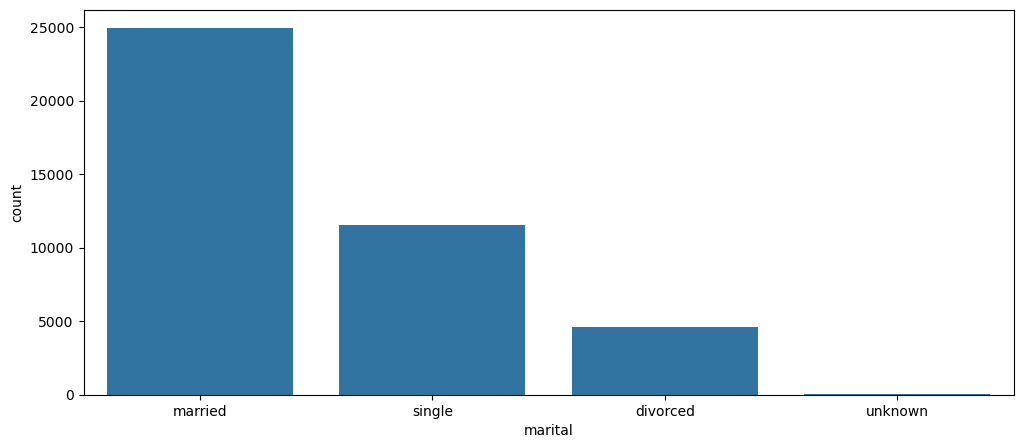

In [13]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='marital', order=df['marital'].value_counts().index[:10])
plt.xlabel('marital')
plt.ylabel('count')
plt.show()

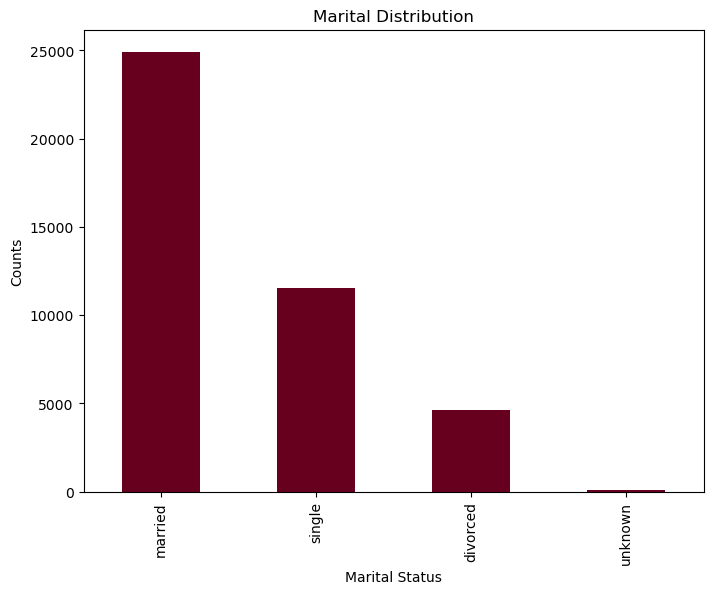

In [14]:
df.marital.value_counts().plot(kind = 'bar', figsize = (8, 6), 
xlabel = 'Marital Status', 
ylabel = 'Counts', rot = 90,
fontsize = 10, colormap = 'RdBu', 
title = 'Marital Distribution')
plt.show()

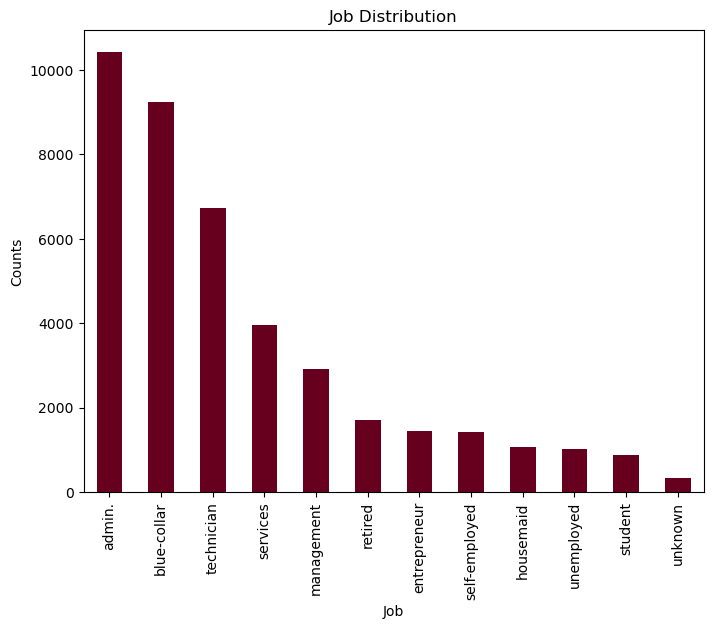

In [15]:
df.job.value_counts().plot(kind = 'bar', figsize = (8, 6), 
xlabel = 'Job', 
ylabel = 'Counts', 
rot = 90, fontsize = 10, 
colormap = 'RdBu', title = "Job Distribution")
plt.show()

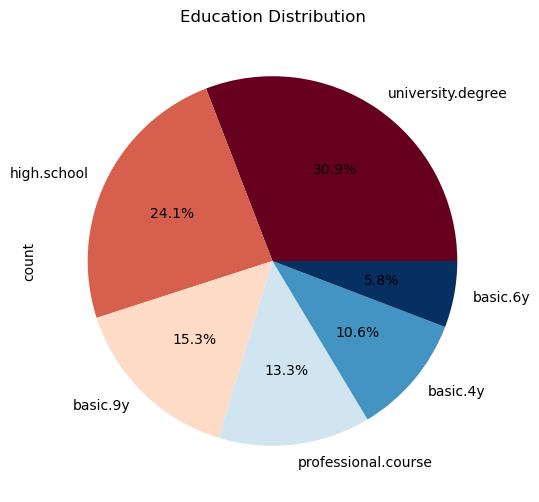

In [16]:
df.education.value_counts().nlargest(6).plot(kind = 'pie', figsize = (8, 6), 
autopct = '%1.1f%%', 
rot = 90, fontsize = 10, 
colormap = 'RdBu', title = "Education Distribution")
plt.show()

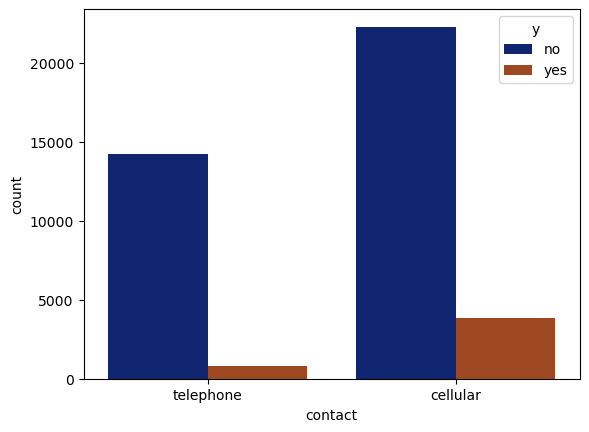

In [17]:
sns.countplot(data = df, x = df.contact, hue = df.y, palette = 'dark')
plt.show()

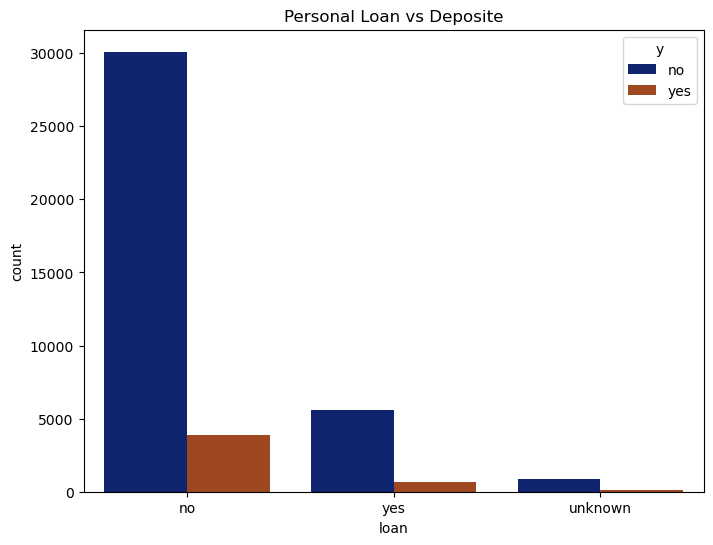

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x = df.loan, hue = df.y, palette = 'dark')
plt.title("Personal Loan vs Deposite")
plt.show()

In [19]:
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

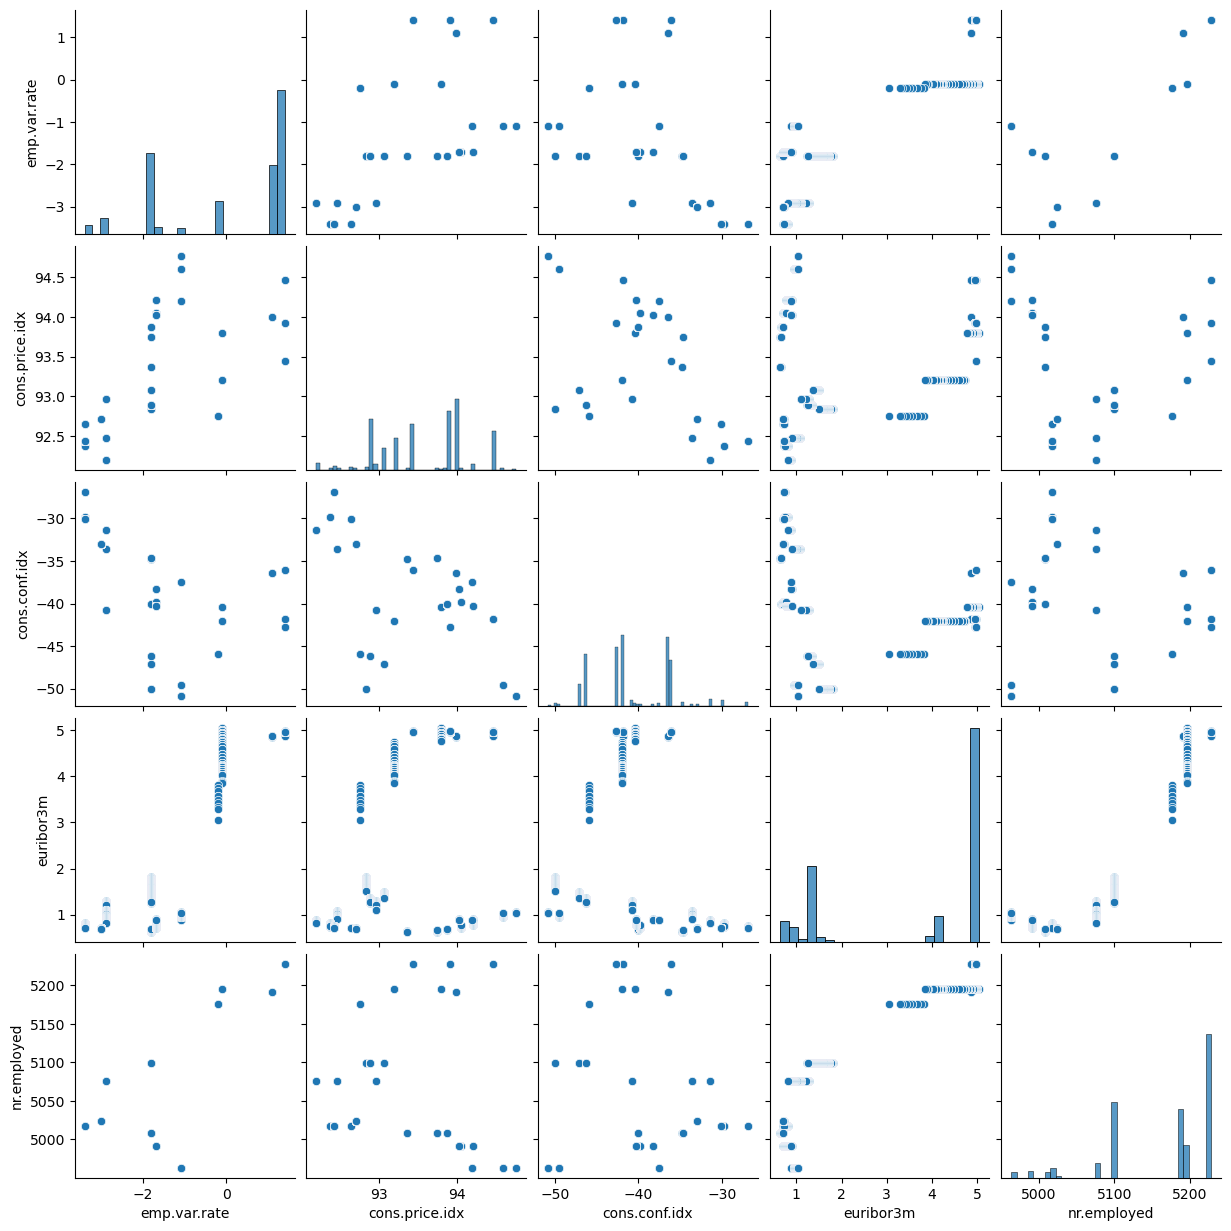

In [87]:
import warnings 
warnings.filterwarnings('ignore')
features = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
sns.pairplot(df[features], palette = 'bright')
plt.show()

## **Step 3 : Data Preprocessing**

In [49]:
label_encoder = LabelEncoder()
categorical_columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

for i in categorical_columns:
    df[i] = df[i].astype(str)
    df[i] = label_encoder.fit_transform(df[i])

**Define features (X) and target (y)**

In [51]:
x = df.drop(columns={'y'})
y = df['y']

In [55]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [59]:
x_scaled

array([[ 1.53303429, -0.20157925, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       [ 1.62899323,  0.91122681, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       [-0.29018564,  0.91122681, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       ...,
       [ 1.53303429,  0.35482378, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 0.38152696,  1.46762984, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 3.26029527,  0.35482378, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ]])

## **Step 4: Model Building**
To train and evaluate an SVM model using various kernels (linear, sigmoid, and RBF) and compare their performance.

Common steps include:
- **Model Training**:
For each kernel type, an SVM model is trained on the scaled features (X_scaled) and labels (y).

- **Prediction**:
The trained model makes predictions on the same dataset (X_scaled).

- **Evaluation Metrics**:

 - **Accuracy**: The proportion of correctly classified instances.
 - **Confusion Matrix**: Breakdown of true and false predictions.
 - **Classification Report**: Provides precision, recall, and F1-score for each class.

**Split into training and testing sets**

* **train_test_split()** splits data into training (80%) and testing (20%) subsets.
* **random_state=42** ensures reproducibility by generating the same split each time.

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state = 42) # both test_size=0.2

In [63]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12556,40,1,1,2,1,2,0,1,3,1,94,2,999,0,1,1.4,93.918,-42.7,4.960,5228.1
35451,31,0,1,6,0,0,0,0,6,1,116,4,999,0,1,-1.8,92.893,-46.2,1.244,5099.1
30592,59,5,1,0,0,0,0,0,6,1,13,6,999,1,0,-1.8,92.893,-46.2,1.354,5099.1
17914,43,3,0,2,0,2,0,0,3,3,94,5,999,0,1,1.4,93.918,-42.7,4.961,5228.1
3315,39,0,2,3,1,0,0,1,6,2,344,2,999,0,1,1.1,93.994,-36.4,4.860,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,5,1,5,1,0,0,1,6,3,427,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0
11284,37,4,1,6,0,0,0,1,4,2,288,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1
38158,35,0,1,3,0,2,0,0,8,2,194,1,4,1,2,-3.4,92.431,-26.9,0.754,5017.5
860,40,4,1,6,0,2,0,1,6,4,295,2,999,0,1,1.1,93.994,-36.4,4.856,5191.0


In [65]:
y_train

12556     no
35451     no
30592     no
17914     no
3315      no
        ... 
6265      no
11284     no
38158    yes
860       no
15795     no
Name: y, Length: 32950, dtype: object

In [67]:
svc = SVC()
svc

SVC()

In [71]:
svc.fit(x_train, y_train)

SVC()

In [73]:
y_pred = svc.predict(x_test)

In [75]:
acc = accuracy_score(y_test, y_pred)

In [77]:
acc

0.8945132313668366

In [79]:
classification = classification_report(y_test, y_pred)
print(classification)

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7303
         yes       0.60      0.21      0.31       935

    accuracy                           0.89      8238
   macro avg       0.75      0.59      0.63      8238
weighted avg       0.87      0.89      0.87      8238



# **Step 5 : Model Evaluation**

In [81]:
svc = SVC(kernel="Linear")
svc

SVC(kernel='Linear')

In [83]:
def train_and_evaluate_svm(kernel_type):
    print(f"\nTraning SVM with{kernel_type} kernel...")
    svc = SVC(kernel=kernel_type)
    svc.fit(x_scaled, y)

    y_pred = svc.predict(x_scaled)
    accuracy = svc.score(x_scaled, y)

    
    print(f"Accuracy for {kernel_type} kernel: {accuracy:.2f}")
    print(f"Confusion Matrix for {kernel_type} kernel:\n" , confusion_matrix(y, y_pred))
    print(f"Classification Report for {kernel_type} kernel:\n", classification_report(y, y_pred))

for kernel in ['linear','sigmoid','rbf','poly']:
    train_and_evaluate_svm(kernel)    


Traning SVM withlinear kernel...
Accuracy for linear kernel: 0.90
Confusion Matrix for linear kernel:
 [[35796   752]
 [ 3269  1371]]
Classification Report for linear kernel:
               precision    recall  f1-score   support

          no       0.92      0.98      0.95     36548
         yes       0.65      0.30      0.41      4640

    accuracy                           0.90     41188
   macro avg       0.78      0.64      0.68     41188
weighted avg       0.89      0.90      0.89     41188


Traning SVM withsigmoid kernel...
Accuracy for sigmoid kernel: 0.87
Confusion Matrix for sigmoid kernel:
 [[33842  2706]
 [ 2761  1879]]
Classification Report for sigmoid kernel:
               precision    recall  f1-score   support

          no       0.92      0.93      0.93     36548
         yes       0.41      0.40      0.41      4640

    accuracy                           0.87     41188
   macro avg       0.67      0.67      0.67     41188
weighted avg       0.87      0.87      0.87